In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from random import randint
from scipy.signal import correlate
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict

In [2]:
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
df_train = pd.read_csv('train.csv',index_col='Id')
df_test = pd.read_csv('test.csv',index_col='Id')
# combine train and test datas in to one dataframe
df_all = pd.concat([df_train,df_test], sort=True)
df_all.head(2)

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
Id                                                                        
1        856       854          0   NaN             3     1Fam       TA   
2       1262         0          0   NaN             3     1Fam       TA   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
Id                                       ...                                  
1            No       706.0         0.0  ...         WD           0    Pave   
2            Gd       978.0         0.0  ...         WD           0    Pave   

    TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
Id                                                                          
1              8       856.0     AllPub          0      2003         2003   
2              6      1262.0     AllPub        298      1976         1976   

   YrSold  
Id         
1    2008  
2    2007  

[2 rows x 80 columns]

In [4]:
cols_with_na = df_all.drop('SalePrice',axis=1).isnull().sum()
cols_with_na = cols_with_na[cols_with_na>0]
print(cols_with_na.sort_values(ascending=False))

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64


In [5]:
df_all[df_all['TotalBsmtSF'].isnull()]

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
Id                                                                          
2121       896         0          0   NaN             2     1Fam      NaN   

     BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
Id                                         ...                                  
2121          NaN         NaN         NaN  ...      ConLD           0    Pave   

      TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
Id                                                                            
2121             4         NaN     AllPub          0      1946         1950   

     YrSold  
Id           
2121   2008  

[1 rows x 80 columns]

In [6]:
cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    df_all[col].fillna(0, inplace=True)
cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",  "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    df_all[col].fillna("missing", inplace=True)
cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    df_all[col].fillna(df_all[col].mode()[0], inplace=True)

In [7]:
df_all['MSSubClass'] = df_all['MSSubClass'].apply(float)
df_all['YrSold'] = df_all['YrSold'].astype(float)
df_all['MoSold'] = df_all['MoSold'].astype(float)

In [8]:
df_all.isnull().sum()[df_all.isnull().sum()>0]

GarageYrBlt     159
LotFrontage     486
SalePrice      1459
dtype: int64

In [9]:
df_all['BsmtFullBath'] = df_all['BsmtFullBath'] + 0.5*df_all['BsmtHalfBath']
df_all['FullBath'] = df_all['FullBath'] + 0.5*df_all['HalfBath']
df_all.drop(['BsmtHalfBath','HalfBath'],axis=1,inplace=True)

In [10]:
df_all['HasPool'] = (df_all['PoolArea']>0)
df_all['Has3SsnPorch'] = (df_all['3SsnPorch']>0)
df_all.drop(['PoolQC','PoolArea','3SsnPorch'],axis=1,inplace=True)

In [11]:
#removing columns with high na values PoolQC,MiscFeature,Alley,Fence,FireplaceQu

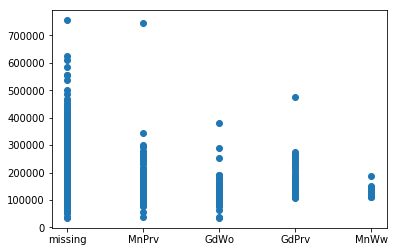

In [12]:
plt.scatter(df_all['Fence'],df_all['SalePrice'])

In [13]:
cols_high_na=['MiscFeature','Alley','Fence']
df_all.drop(cols_high_na,axis=1,inplace=True)

In [14]:
zeros_cols = ((df_all==0).sum()/len(df_all))
zeros_cols = zeros_cols[zeros_cols>0]
print(zeros_cols.sort_values(ascending=False))

HasPool          0.995546
Has3SsnPorch     0.987324
LowQualFinSF     0.986297
MiscVal          0.964714
ScreenPorch      0.912299
BsmtFinSF2       0.881124
EnclosedPorch    0.842754
MasVnrArea       0.603289
2ndFlrSF         0.571429
BsmtFullBath     0.531689
WoodDeckSF       0.521754
Fireplaces       0.486468
OpenPorchSF      0.444673
BsmtFinSF1       0.318602
BsmtUnfSF        0.082905
GarageArea       0.054128
GarageCars       0.054128
TotalBsmtSF      0.027064
BedroomAbvGr     0.002741
KitchenAbvGr     0.001028
FullBath         0.001028
dtype: float64


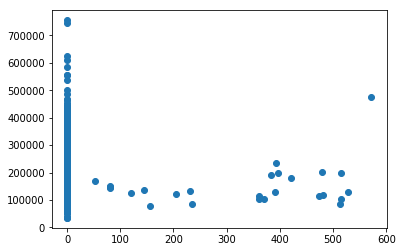

In [15]:
plt.scatter(df_all['LowQualFinSF'],df_all['SalePrice'])

In [16]:
frac_zeros = ((df_all==0).sum()/len(df_all))
# no. unique values in each column
n_unique = df_all.nunique()

# difference between frac. zeros and expected
# frac. zeros if values evenly distributed between
# classes
xs_zeros = frac_zeros - 1/n_unique

# create dataframe and display which columns may be problematic
zero_cols = pd.DataFrame({'frac_zeros':frac_zeros,'n_unique':n_unique,'xs_zeros':xs_zeros})
zero_cols = zero_cols[zero_cols.frac_zeros>0]
zero_cols.sort_values(by='xs_zeros',ascending=False,inplace=True)
display(zero_cols[(zero_cols.xs_zeros>0)])

frac_zeros  n_unique  xs_zeros
LowQualFinSF     0.986297        36  0.958519
MiscVal          0.964714        38  0.938398
ScreenPorch      0.912299       121  0.904034
BsmtFinSF2       0.881124       272  0.877447
EnclosedPorch    0.842754       183  0.837290
MasVnrArea       0.603289       444  0.601037
2ndFlrSF         0.571429       635  0.569854
WoodDeckSF       0.521754       379  0.519116
HasPool          0.995546         2  0.495546
Has3SsnPorch     0.987324         2  0.487324
OpenPorchSF      0.444673       252  0.440705
BsmtFullBath     0.531689         6  0.365022
BsmtFinSF1       0.318602       991  0.317593
Fireplaces       0.486468         5  0.286468
BsmtUnfSF        0.082905      1135  0.082024
GarageArea       0.054128       603  0.052470
TotalBsmtSF      0.027064      1058  0.026119

In [17]:
dummy_cols = zero_cols[(zero_cols.xs_zeros>0)].index
for col in dummy_cols:
    df_all['Has'+col] = (df_all[col]>0).astype(int)

In [18]:
#get numeric columns

In [19]:
'''df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['2ndFlrSF'] = df_all['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
df_all['GarageArea'] = df_all['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
df_all['GarageCars'] = df_all['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)
df_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
#df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)'''

"df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)\ndf_all['2ndFlrSF'] = df_all['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)\ndf_all['GarageArea'] = df_all['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)\ndf_all['GarageCars'] = df_all['GarageCars'].apply(lambda x: 0 if x <= 0.0 else x)\ndf_all['LotFrontage'] = df_all['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)\n#df_all['MasVnrArea'] = df_all['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)\ndf_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)"

In [20]:
df_all_num=[]
for col in df_all.columns:
    if df_all[col].dtype.name!='object':
        df_all_num.append(col)

In [21]:
df_all_cat=[]
for col in df_all.columns:
    if df_all[col].dtype.name=='object':
        df_all_cat.append(col)

In [22]:
df_all[df_all_cat].head(2)

BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
Id                                                                     
1      1Fam       TA           No          GLQ          Unf       Gd   
2      1Fam       TA           Gd          ALQ          Unf       Gd   

   CentralAir Condition1 Condition2 Electrical    ...    MSZoning MasVnrType  \
Id                                                ...                          
1           Y       Norm       Norm      SBrkr    ...          RL    BrkFace   
2           Y      Feedr       Norm      SBrkr    ...          RL       None   

   Neighborhood PavedDrive RoofMatl RoofStyle SaleCondition SaleType Street  \
Id                                                                            
1       CollgCr          Y  CompShg     Gable        Normal       WD   Pave   
2       Veenker          Y  CompShg     Gable        Normal       WD   Pave   

   Utilities  
Id            
1     AllPub  
2     AllPub  

[2 rows x 39 columns]

In [23]:
#transform numeric data

In [24]:
cols_with_na = df_all.drop('SalePrice',axis=1).isnull().sum()
cols_with_na = cols_with_na[cols_with_na>0]
print(cols_with_na.sort_values(ascending=False))

LotFrontage    486
GarageYrBlt    159
dtype: int64


In [25]:
df_all.loc[df_all.GarageYrBlt.isnull(),'GarageYrBlt'] = df_all.loc[df_all.GarageYrBlt.isnull(),'YearBuilt']

In [26]:
'''df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))'''

'df_all["LotFrontage"] = df_all.groupby("Neighborhood")["LotFrontage"].transform(\n    lambda x: x.fillna(x.median()))'

In [27]:
df=pd.get_dummies(df_all)
test_LotFrontage=df.loc[df.LotFrontage.isna()]
train_LotFrontage=df.loc[df.LotFrontage.notna()]
X_train,y_train=train_LotFrontage.drop(['LotFrontage','SalePrice'],axis=1),train_LotFrontage['LotFrontage']
X_test,y_test=test_LotFrontage.drop(['LotFrontage','SalePrice'],axis=1),test_LotFrontage['LotFrontage']
lr=linear_model.Ridge().fit(X_train,y_train)
y_=lr.predict(X_test)
y_test=pd.Series(y_)

j=0
for i in test_LotFrontage.index:
    df_all.set_value(i,'LotFrontage',y_[j])
    j+=1

In [28]:
#removing outliers

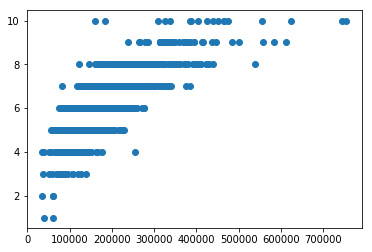

In [29]:
plt.scatter(df_all['SalePrice'],df_all['OverallQual'])

In [30]:
df_all.drop(df_all[(df_all['OverallQual']<5) & (df_all['SalePrice']>200000)].index, inplace=True)

In [31]:
#df_all.drop(df_all[(df_all['OverallQual']>9) & (df_all['SalePrice']<200000)].index, inplace=True)

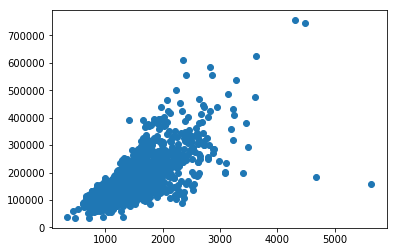

In [32]:
plt.scatter(df_all['GrLivArea'],df_all['SalePrice'])

In [33]:
df_all.drop(df_all[(df_all["GrLivArea"]>4000)&(df_all["SalePrice"]<300000)].index,inplace=True)

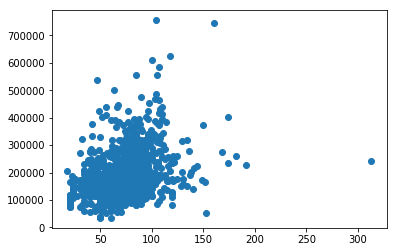

In [34]:
plt.scatter(df_all['LotFrontage'],df_all['SalePrice'])

In [35]:
for index,row in df_all.iterrows():
    if (row['LotFrontage']>300) & (row['SalePrice']<300000):
        df_all.set_value(index, 'LotFrontage', df_all['LotFrontage'].mode()[0])
    elif (row['LotFrontage']>150) & (row['SalePrice']<100000):
        df_all.set_value(index, 'LotFrontage', 80)

In [36]:
'''for index,row in df_all.iterrows():
    if (row['GrLivArea']>4000) & (row['SalePrice']<200000):
        df_all.set_value(index, 'GrLivArea', df_all['GrLivArea'].mode()[0])'''

"for index,row in df_all.iterrows():\n    if (row['GrLivArea']>4000) & (row['SalePrice']<200000):\n        df_all.set_value(index, 'GrLivArea', df_all['GrLivArea'].mode()[0])"

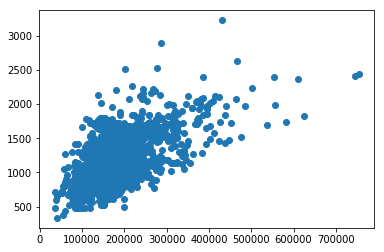

In [37]:
plt.scatter(df_all['SalePrice'],df_all['1stFlrSF'])

In [38]:
#df_all.drop(df_all[(df_all["SalePrice"]>700000)].index,inplace=True)

In [39]:
'''for index,row in df_all.iterrows():
    if (row['1stFlrSF']>3000) & (row['SalePrice']<200000):
        df_all.set_value(index, '1stFlrSF', 1800)'''

"for index,row in df_all.iterrows():\n    if (row['1stFlrSF']>3000) & (row['SalePrice']<200000):\n        df_all.set_value(index, '1stFlrSF', 1800)"

In [40]:
df_all['TotArea']=df_all['1stFlrSF']+df_all['2ndFlrSF']+df_all['TotalBsmtSF']
df_all=df_all.drop(['1stFlrSF','2ndFlrSF','TotalBsmtSF'],axis=1)

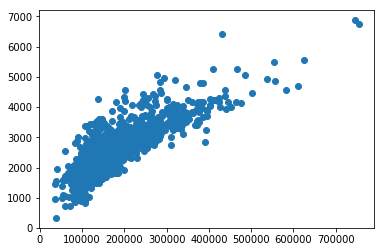

In [41]:
plt.scatter(df_all['SalePrice'],df_all['TotArea'])

In [42]:
#plt.scatter(df_all['SalePrice'],df_all['2ndFlrSF'])

In [43]:
df_all["TotalPlace"] =( df_all["TotArea"] + df_all["GarageArea"] + df_all["OpenPorchSF"])* df_all["OverallQual"]
df_all["PorchQual"] = df_all["OpenPorchSF"] * df_all["OverallQual"]
df_all["TotArea"] = df_all["TotArea"] * df_all["OverallQual"]
df_all['ToT']=(df_all['TotArea']+df_all['GrLivArea']+df_all["BsmtFinSF2"] +df_all['GarageArea']+df_all['BsmtFinSF1'])*df_all['OverallQual']
df_all['BsmtFinSF1Qual']=df_all['BsmtFinSF1']*df_all['OverallQual']
#df_all=df_all.drop(['TotArea','GrLivArea','GarageArea','OverallQual'],axis=1)
df_all["Bsmt"] =( df_all["BsmtFinSF1"] + df_all["BsmtUnfSF"])* df_all["OverallQual"]
df_all["Rooms"] = (df_all["FullBath"]+df_all["TotRmsAbvGrd"])* df_all["OverallQual"]
df_all["LotArea"] = df_all["LotArea"] * df_all["OverallQual"]

In [44]:
df_all.drop(['BsmtFinSF2'],axis=1,inplace=True)

In [45]:
#df_all=df_all.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

In [46]:
#plt.scatter(df_all['ToT'],df_all['SalePrice'])

In [47]:
(df_all["ToT"] ).corr(df_all['SalePrice'])

0.9256692433689366

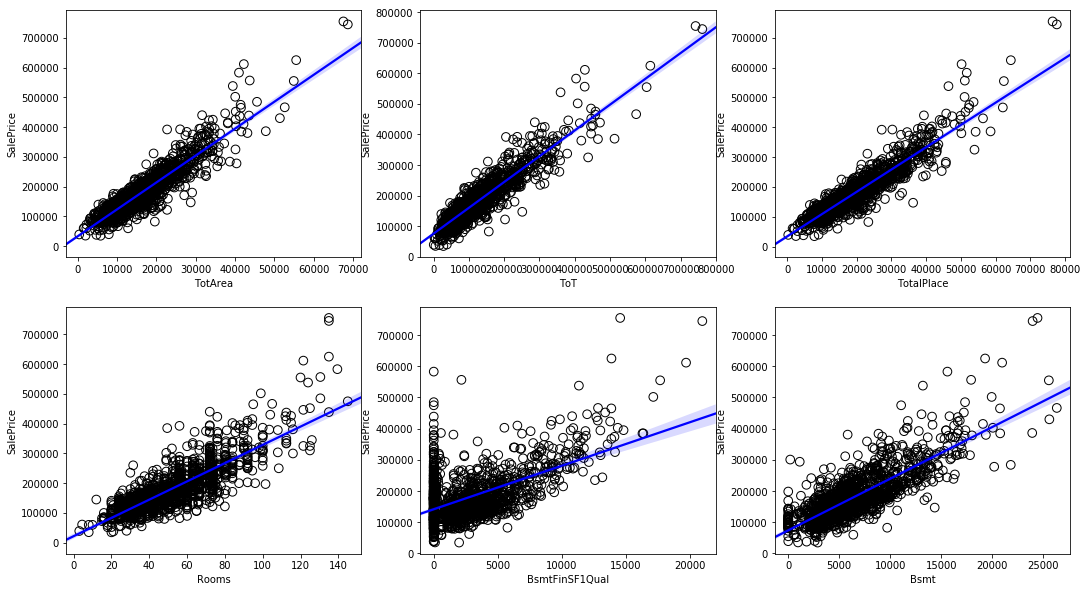

In [48]:
import seaborn as sns
plt.figure(figsize=(18,10))
features=['TotArea','ToT','TotalPlace','Rooms','BsmtFinSF1Qual','Bsmt']
for i in range(len(features)):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    plt.scatter(df_all[features[i]], df_all['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = features[i], y = 'SalePrice', data = df_all,scatter=False, color = 'Blue')

In [49]:
#dummies cat data

In [50]:
df_all_num=[]
for col in df_all.columns:
    if df_all[col].dtype.name!='object':
        df_all_num.append(col)

In [51]:
'''from scipy.stats import skew
df_all_num=df_all_num
df_numeric=df_all[df_all_num]
#f_numeric=np.log1p(df_all[df_all_num])
skewed_feats = df_numeric.apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
df_numeric[skewed_feats] = np.log1p(df_numeric[skewed_feats])
df_numeric[skewed_feats] = df_numeric[skewed_feats].fillna(df_numeric[skewed_feats].mean())
#df_numeric['SalePrice']=np.log(df_numeric['SalePrice'])
#len(df_numeric[df_numeric==0])
df_numeric.head(2)'''
loglist = ['SalePrice','LotFrontage','LotArea','BsmtFinSF1','BsmtUnfSF',
                 'TotalPlace','TotArea','ToT','GrLivArea',
                 'BsmtFullBath','FullBath','BedroomAbvGr','KitchenAbvGr',
                 'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
                 'YearRemodAdd','BsmtFinSF1Qual','Bsmt','Rooms']
df_all_num=df_all_num
num_no_scale=[item for item in df_all_num if item not in loglist]
#df_numeric=df_all[num_no_scale]
df_numeric=pd.concat([np.log1p(df_all[loglist]),df_all[num_no_scale]],axis=1)
#df_numeric=df_numeric.drop
#df_numeric['SalePrice']=np.log(df_numeric['SalePrice'])
#len(df_numeric[df_numeric==0])
df_numeric.head(2)

SalePrice  LotFrontage    LotArea  BsmtFinSF1  BsmtUnfSF  TotalPlace  \
Id                                                                         
1   12.247699     4.189655  10.987849    6.561031   5.017280   10.009018   
2   12.109016     4.394449  10.961295    6.886532   5.652489    9.792835   

     TotArea        ToT  GrLivArea  BsmtFullBath    ...      HasHasPool  \
Id                                                  ...                   
1   9.796069  11.894665   7.444833      0.693147    ...               0   
2   9.625426  11.581191   7.141245      0.405465    ...               0   

    HasHas3SsnPorch  HasOpenPorchSF  HasBsmtFullBath  HasBsmtFinSF1  \
Id                                                                    
1                 0               1                1              1   
2                 0               0                1              1   

    HasFireplaces  HasBsmtUnfSF  HasGarageArea  HasTotalBsmtSF  PorchQual  
Id                                                                         
1               0             1              1               1        427  
2               1             1              1               1          0  

[2 rows x 55 columns]

In [52]:
#df_numeric['BsmtFinSF1']=df_numeric['BsmtFinSF1'].replace(8,7)

In [53]:
df_cat=df_all[df_all_cat]

In [54]:
'''different way to deal with cateories data'''

'different way to deal with cateories data'

In [55]:
'''for column in df_cat.columns:
    df_cat[column] = pd.Categorical(df_cat[column]).codes'''

'for column in df_cat.columns:\n    df_cat[column] = pd.Categorical(df_cat[column]).codes'

In [56]:
df_cat=pd.get_dummies(df_cat)

In [57]:
df_cat.head(2)

BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
Id                                                                    
1               1                0                0               0   
2               1                0                0               0   

    BldgType_TwnhsE  BsmtCond_Fa  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
Id                                                                        
1                 0            0            0            0            1   
2                 0            0            0            0            1   

    BsmtCond_missing        ...         SaleType_ConLD  SaleType_ConLI  \
Id                          ...                                          
1                  0        ...                      0               0   
2                  0        ...                      0               0   

    SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  Street_Grvl  \
Id                                                                         
1                0             0             0            1            0   
2                0             0             0            1            0   

    Street_Pave  Utilities_AllPub  Utilities_NoSeWa  
Id                                                   
1             1                 1                 0  
2             1                 1                 0  

[2 rows x 249 columns]

In [58]:
corr=[]
for column in df_cat.columns:
    corr.append([column,abs(df_numeric['SalePrice'].corr(df_cat[column]))])
corr=pd.DataFrame(corr)
corr.columns=['ColumnName','SalePrice']
corr=corr.sort_values(['SalePrice'], ascending=[0])

In [59]:
corr.head(5)

ColumnName  SalePrice
66          ExterQual_TA   0.597368
162       KitchenQual_TA   0.538177
106     Foundation_PConc   0.532205
65          ExterQual_Gd   0.510752
103  FireplaceQu_missing   0.509913

In [60]:
#df_cat=df_cat.drop(['Condition2','MasVnrType','GarageQual','BsmtFinType2','Utilities'],axis=1)

In [61]:
#df_cat=pd.get_dummies(df_cat)

In [62]:
#df_cat.head(2)

In [66]:
frac_zeros = ((df_model==0).sum()/len(df_model))
# no. unique values in each column
n_unique = df_model.nunique()

# difference between frac. zeros and expected
# frac. zeros if values evenly distributed between
# classes
xs_zeros = frac_zeros - 1/n_unique

# create dataframe and display which columns may be problematic
zero_cols = pd.DataFrame({'frac_zeros':frac_zeros,'n_unique':n_unique,'xs_zeros':xs_zeros})
zero_cols = zero_cols[zero_cols.frac_zeros>0]
zero_cols.sort_values(by='frac_zeros',ascending=False,inplace=True)
display(zero_cols[(zero_cols.xs_zeros>0)])

frac_zeros  n_unique  xs_zeros
Utilities_NoSeWa       0.999657         2  0.499657
Heating_Floor          0.999657         2  0.499657
RoofMatl_Metal         0.999657         2  0.499657
RoofMatl_Membran       0.999657         2  0.499657
Condition2_RRAe        0.999657         2  0.499657
Condition2_RRAn        0.999657         2  0.499657
Electrical_Mix         0.999657         2  0.499657
Exterior1st_ImStucc    0.999657         2  0.499657
Exterior2nd_Other      0.999657         2  0.499657
RoofMatl_Roll          0.999657         2  0.499657
Exterior1st_Stone      0.999314         2  0.499314
Condition2_RRNn        0.999314         2  0.499314
Functional_Sev         0.999314         2  0.499314
Heating_OthW           0.999314         2  0.499314
Exterior1st_AsphShn    0.999314         2  0.499314
Exterior1st_CBlock     0.999314         2  0.499314
Exterior2nd_CBlock     0.998971         2  0.498971
Condition2_PosN        0.998971         2  0.498971
HeatingQC_Po           0.998971         2  0.498971
ExterCond_Po           0.998971         2  0.498971
GarageCond_Ex          0.998971         2  0.498971
GarageQual_Ex          0.998971         2  0.498971
Condition2_PosA        0.998628         2  0.498628
Exterior2nd_AsphShn    0.998628         2  0.498628
SaleType_Con           0.998285         2  0.498285
GarageQual_Po          0.998285         2  0.498285
BsmtCond_Po            0.998285         2  0.498285
Foundation_Wood        0.998285         2  0.498285
Condition2_Artery      0.998285         2  0.498285
RoofStyle_Shed         0.998285         2  0.498285
...                         ...       ...       ...
BsmtFinType1_Unf       0.708162         2  0.208162
HeatingQC_TA           0.706104         2  0.206104
HouseStyle_2Story      0.701646         2  0.201646
MasVnrType_BrkFace     0.698560         2  0.198560
LotShape_IR1           0.668724         2  0.168724
ExterQual_Gd           0.664266         2  0.164266
Exterior2nd_VinylSd    0.651920         2  0.151920
Exterior1st_VinylSd    0.648148         2  0.148148
KitchenQual_Gd         0.605624         2  0.105624
MasVnrArea             0.603567       442  0.601304
HasMasVnrArea          0.603567         2  0.103567
BsmtQual_Gd            0.585734         2  0.085734
GarageFinish_Unf       0.578189         2  0.078189
Foundation_CBlock      0.576818         2  0.076818
Has2ndFlrSF            0.571674         2  0.071674
BsmtQual_TA            0.560014         2  0.060014
Foundation_PConc       0.552126         2  0.052126
HasBsmtFullBath        0.532236         2  0.032236
BsmtFullBath           0.532236         6  0.365569
WoodDeckSF             0.522291       379  0.519652
HasWoodDeckSF          0.522291         2  0.022291
FireplaceQu_missing    0.513032         2  0.013032
Fireplaces             0.486968         5  0.286968
PorchQual              0.445130       475  0.443025
OpenPorchSF            0.445130       250  0.441130
BsmtFinSF1Qual         0.318930      1405  0.318218
BsmtFinSF1             0.318930       989  0.317919
BsmtUnfSF              0.082990      1135  0.082109
GarageArea             0.054184       602  0.052523
Bsmt                   0.027092      1718  0.026510

[246 rows x 3 columns]

In [67]:
zero_cols[100:101]

frac_zeros  n_unique  xs_zeros
SaleCondition_Family    0.984225         2  0.484225

In [68]:
df_model5=df_model.drop(list(zero_cols.index)[0:100],axis=1)

In [75]:
df_model6=df_model[(df_model2.columns).intersection(df_model5.columns)]

In [65]:
df_model=pd.concat([df_numeric,df_cat],axis=1)

In [71]:
lasso=linear_model.Lasso(alpha=0.001)
X,y=df_model[0:1457].drop(['SalePrice'],axis=1).values,(df_model['SalePrice'][0:1457]).values
lasso.fit(X,y)
FI_lasso = pd.DataFrame({"Feature Importance":abs(lasso.coef_)}, index=df_model.drop(['SalePrice'],axis=1).columns)
FI_lasso=FI_lasso.sort_values("Feature Importance",ascending=False)

In [72]:
df_model2=df_model.drop(list(FI_lasso.index)[73:],axis=1)

In [73]:
df_model3=df_model.drop(list(FI_lasso.index)[150:],axis=1)

In [74]:
df_model4=df_model.drop(list(FI_lasso.index)[60:],axis=1)

In [76]:
'''import seaborn as sns
%matplotlib inline
df_corr = df_model.loc[id_train, df_model.columns].corr(method='spearman').abs()
df_corr = df_corr.sort_values('SalePrice',axis=0,ascending=False).sort_values('SalePrice',axis=1,ascending=False)
ax=plt.figure(figsize=(20,16)).gca()
sns.heatmap(df_corr,ax=ax,square=True)'''

"import seaborn as sns\n%matplotlib inline\ndf_corr = df_model.loc[id_train, df_model.columns].corr(method='spearman').abs()\ndf_corr = df_corr.sort_values('SalePrice',axis=0,ascending=False).sort_values('SalePrice',axis=1,ascending=False)\nax=plt.figure(figsize=(20,16)).gca()\nsns.heatmap(df_corr,ax=ax,square=True)"

In [77]:
#df_corr.head(5)

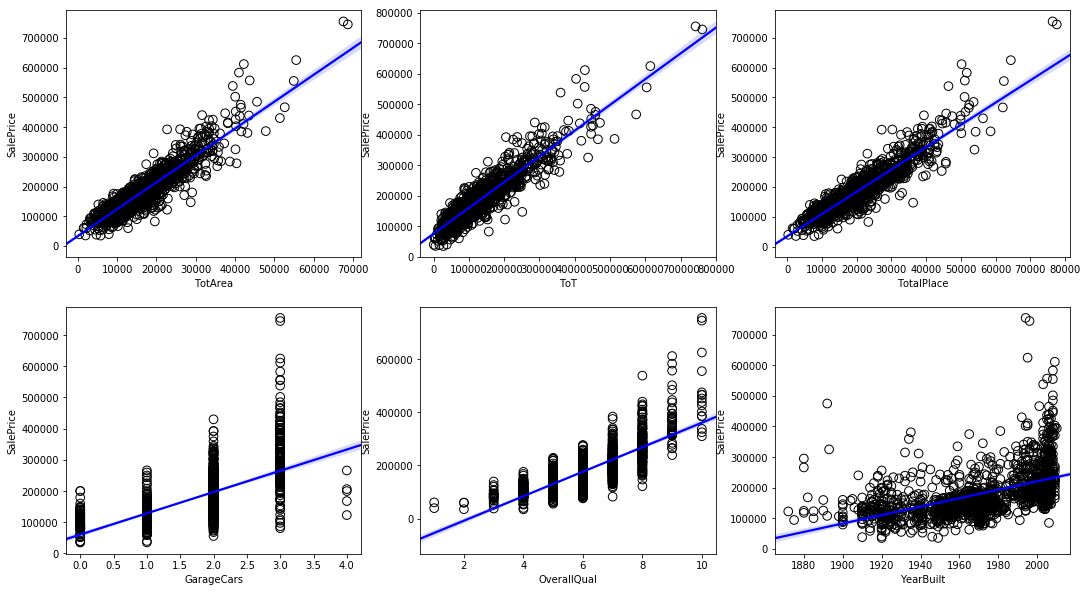

In [78]:
plt.figure(figsize=(18,10))
features=['TotArea','ToT','TotalPlace','GarageCars','OverallQual','YearBuilt']
#features=['TotArea','OverallQual','GrLivArea','GarageCars','FullBath','YearBuilt','GarageArea','ExterQual','GarageYrBlt']
for i in range(len(features)):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    plt.scatter(df_all[features[i]], df_all['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = features[i], y = 'SalePrice', data = df_all,scatter=False, color = 'Blue')
#ax=plt.gca() 
#ax.set_ylim([0,800000])

In [79]:
len(df_model)

2916

In [80]:
#models
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
def predict_data(df_model,mod):
    df_model=df_model.reset_index()
    X,y=df_model[0:1457].drop(['SalePrice'],axis=1).values,(df_model['SalePrice'][0:1457]).values
    X_test,y_test =df_model[1457:].drop(['SalePrice'],axis=1).values,(df_model['SalePrice'][1457:]).values
    # create cross-validation method
    kf = KFold(n_splits=20) # Define the split - into 20 folds 
    kf.get_n_splits(X)
    min_e=np.Inf
    pred=0
    train_pred=0
    rmse_score=0
    random_state = 1234
    rkf = RepeatedKFold(n_splits=30, n_repeats=6, random_state=random_state)
    for train_index, test_index in rkf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model=mod.fit(X_train, y_train)
        y_pred=mod.predict(X_test)
        if np.sqrt(np.mean((np.log(1+np.exp(y_pred)) - np.log(1+np.exp(y_test)))**2))<min_e:
            min_e=np.sqrt(np.mean((np.log(1+np.exp(y_pred)) - np.log(1+np.exp(y_test)))**2))
            rmse_score=np.sqrt(np.mean((np.log(1+np.exp(y_pred)) - np.log(1+np.exp(y_test)))**2))
            X_test=df_model[1457:].drop(['SalePrice'],axis=1).values
            pred=model.predict(X_test)
            pred = np.exp(pred)
            train_pred=model.predict(X)
            train_pred = pd.concat([pd.DataFrame(np.exp(train_pred)),pd.DataFrame(np.exp(y))],axis=1)
            train_pred.columns = ['Predictions','SalePrice']
            #pred=[int(item) for item in pred]
            pred = pd.DataFrame(pred,index=range(1461,2920))
            pred.columns = ['SalePrice']
        
    return pred,rmse_score,train_pred

In [66]:
#df_model.drop(df_model[(np.exp(df_model["SalePrice"])>700000)].index,inplace=True)

In [68]:
#gbr.to_csv('gbr22222220000.csv')

In [81]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [82]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 3) 
gbr,rmg,modg=predict_data(df_model,myGBR)

In [83]:
rmg

0.06104811805717978

In [84]:
gbr.head(5)

SalePrice
1461  125954.635801
1462  156120.001299
1463  189525.683050
1464  195417.044059
1465  187111.177127

In [85]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 3) 
gbr2,rmg,modg2=predict_data(df_model2,myGBR)

In [86]:
rmg

0.05811753822766021

In [87]:
gbr2.head(5)

SalePrice
1461  130161.769870
1462  155998.832724
1463  189484.287609
1464  201717.529412
1465  186457.510055

In [88]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 3) 
gbr3,rmg,modg3=predict_data(df_model3,myGBR)

In [89]:
gbr3.head(5)

SalePrice
1461  129899.983121
1462  158252.312842
1463  187686.839357
1464  200075.244411
1465  187176.597284

In [90]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 3) 
gbr4,rmg,modg4=predict_data(df_model4,myGBR)

In [91]:
gbr4.head(5)

SalePrice
1461  130521.044206
1462  159456.290714
1463  186962.200137
1464  201852.932602
1465  182486.794318

In [92]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 5) 
gbr5,rmg,modg5=predict_data(df_model5,myGBR)

In [93]:
rmg

0.06094100532015264

In [94]:
gbr5.head(5)

SalePrice
1461  125792.186140
1462  157164.260202
1463  186946.920001
1464  194868.363349
1465  185698.012299

In [95]:
myGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.02,
                                      max_depth=4, max_features='sqrt',
                                      min_samples_leaf=15, min_samples_split=50,
                                      loss='huber', random_state = 5) 
gbr6,rmg,modg5=predict_data(df_model6,myGBR)

In [96]:
rmg

0.06190212595334206

In [97]:
gbr6.head(5)

SalePrice
1461  129648.404508
1462  155632.367401
1463  187748.983155
1464  199798.385422
1465  188996.221233

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


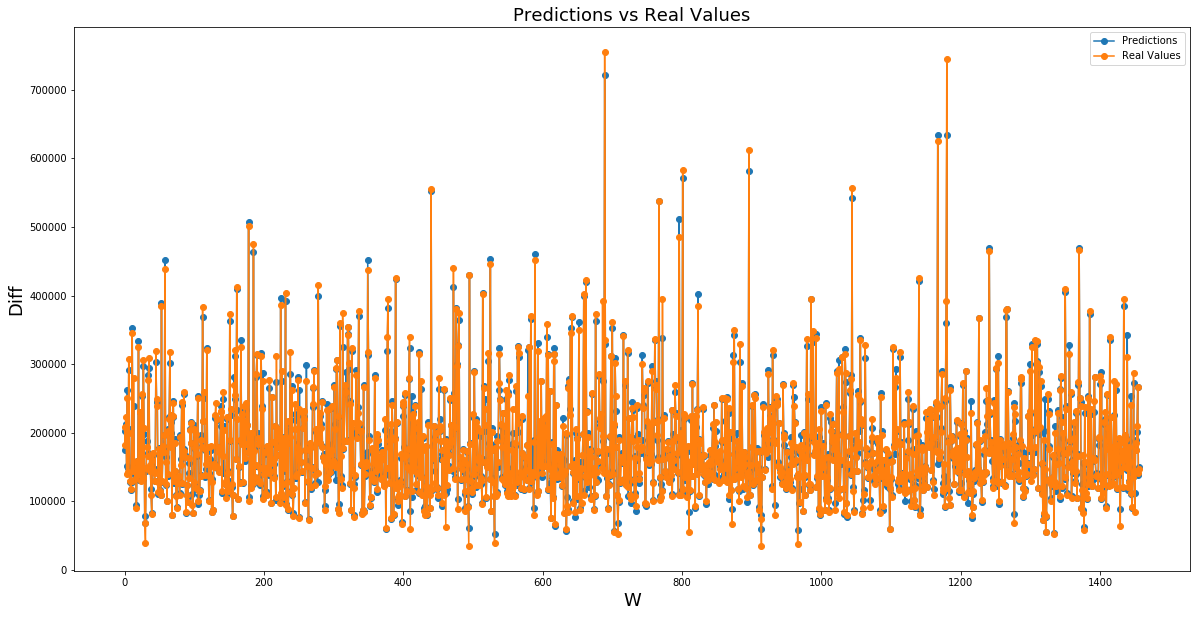

In [98]:
plt.figure(figsize=(20,10))
plt.plot([( row['Predictions'],row['SalePrice']
              ) for index, row in modg.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['Predictions','Real Values'], fontsize=10, loc='upperleft')
plt.show()

In [99]:
lasso1 = make_pipeline(RobustScaler(), linear_model.Lasso(alpha =0.0008))
p,rm,mod=predict_data(df_model,lasso1)

In [100]:
rm

0.06821189583207497

In [101]:
p.head(5)

SalePrice
1461  116360.693449
1462  147798.410493
1463  179439.761744
1464  194784.505290
1465  193495.611800

In [102]:
lasso1 = make_pipeline(RobustScaler(), linear_model.Lasso(alpha =0.0008))
p2,rm,mod2=predict_data(df_model2,lasso1)

In [103]:
rm

0.0635967004423718

In [104]:
p2.head(5)

SalePrice
1461  116130.787777
1462  149738.063079
1463  178195.719834
1464  193230.830749
1465  195148.390391

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


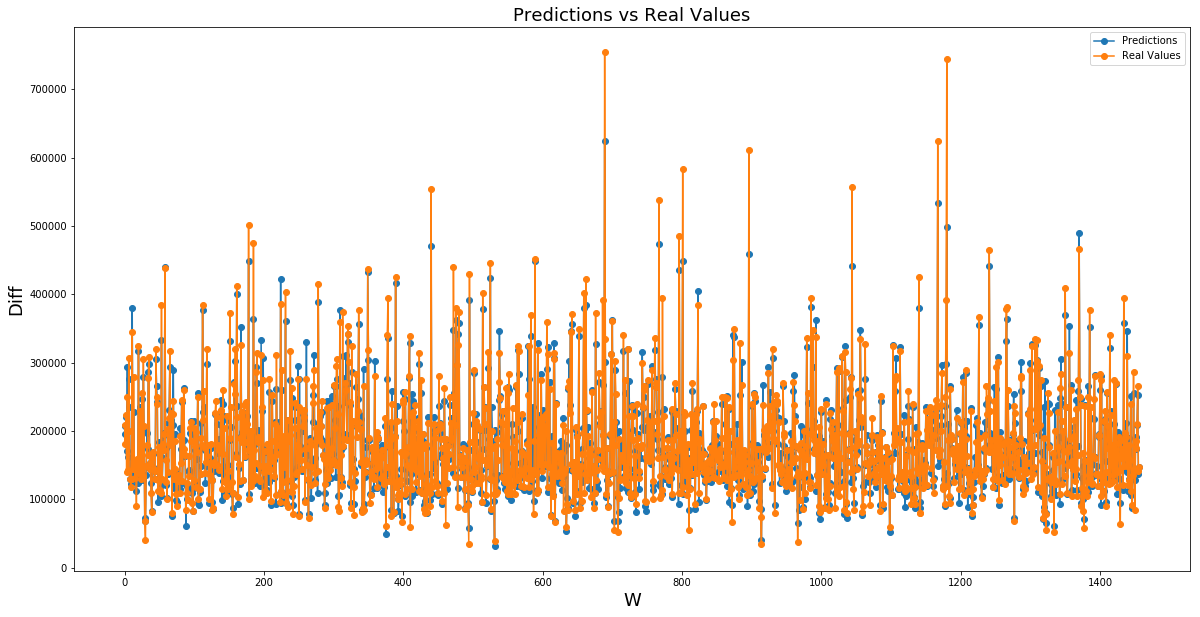

In [105]:
plt.figure(figsize=(20,10))
plt.plot([( row['Predictions'],row['SalePrice']
              ) for index, row in mod.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['Predictions','Real Values'], fontsize=10, loc='upperleft')
plt.show()

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


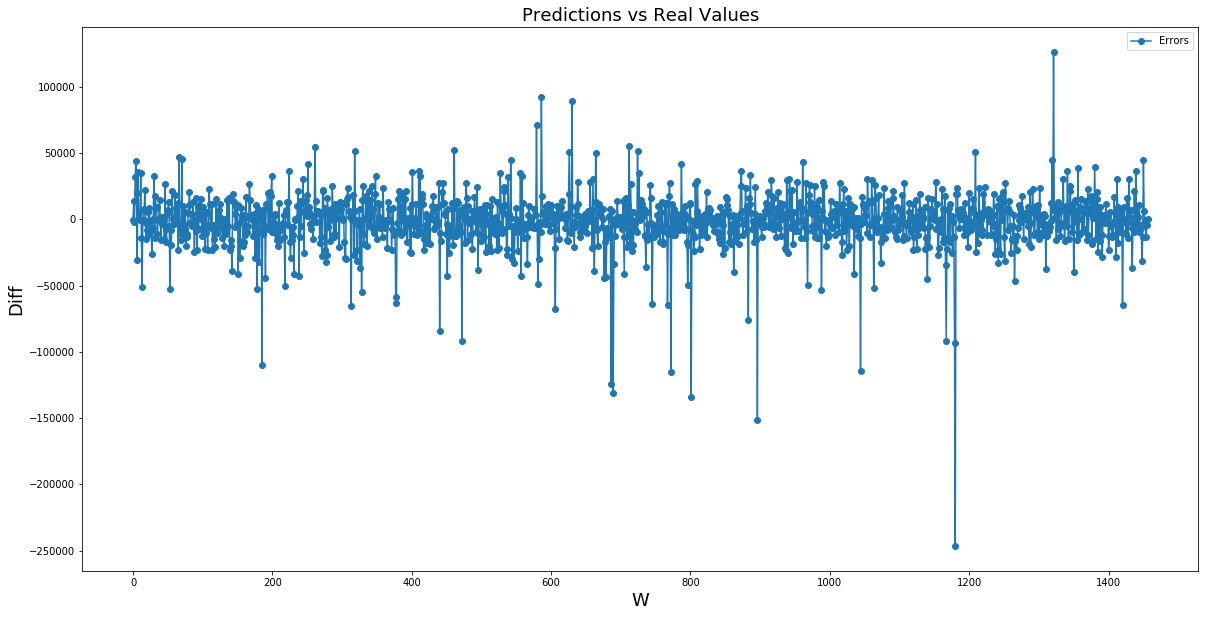

In [106]:
plt.figure(figsize=(20,10))
plt.plot([( row['Predictions']-row['SalePrice']
              ) for index, row in mod.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['Errors'], fontsize=10, loc='upperleft')
plt.show()

In [107]:
np.exp(p).head(7)

SalePrice
1461        inf
1462        inf
1463        inf
1464        inf
1465        inf
1466        inf
1467        inf

In [108]:
lin = make_pipeline(RobustScaler(), linear_model.LinearRegression())

In [109]:
pLL,rmL,modL=predict_data(df_model,lin)

In [110]:
rmL

0.06843045846009208

In [111]:
pLL.head(5)

SalePrice
1461  117936.747608
1462  156966.901170
1463  186972.168361
1464  197704.140436
1465  196610.931669

In [112]:
pLL2,rmL,modL=predict_data(df_model2,lin)

In [113]:
rmL

0.06442397641644786

In [114]:
pLL2.head(7)

SalePrice
1461  115382.471541
1462  153686.887485
1463  178016.982302
1464  190881.370278
1465  200706.544572
1466  169109.313251
1467  172644.854018

In [115]:
L,rmL,mL=predict_data(df_model,linear_model.Ridge(alpha=0.0008))

In [116]:
rmL

0.06835456465407935

In [117]:
L.head(5)

SalePrice
1461  117941.500180
1462  157019.466151
1463  186974.758019
1464  197717.326184
1465  196620.745703

In [118]:
L2,rmL,mL2=predict_data(df_model2,linear_model.Ridge(alpha=0.0008))

In [119]:
rmL

0.0644232724093363

In [120]:
L2.head(5)

SalePrice
1461  115381.104750
1462  153686.548250
1463  178017.446046
1464  190882.205348
1465  200705.974562

In [121]:
ENet = make_pipeline(RobustScaler(), linear_model.ElasticNet(alpha=0.0009, l1_ratio=0.005))
pE,rmE,m=predict_data(df_model,ENet)

C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

In [122]:
rmE

0.06467766694015627

In [123]:
pE.head(5)

SalePrice
1461  116013.511720
1462  154418.913579
1463  184817.975667
1464  195218.494416
1465  196975.718229

In [124]:
ENet = make_pipeline(RobustScaler(), linear_model.ElasticNet(alpha=0.0009, l1_ratio=0.005))
pE2,rmE,m=predict_data(df_model2,ENet)

In [125]:
rmE

0.06415779549055362

In [126]:
pE2.head(5)

SalePrice
1461  114761.817796
1462  153556.777389
1463  178145.116417
1464  191176.776906
1465  199730.427074

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


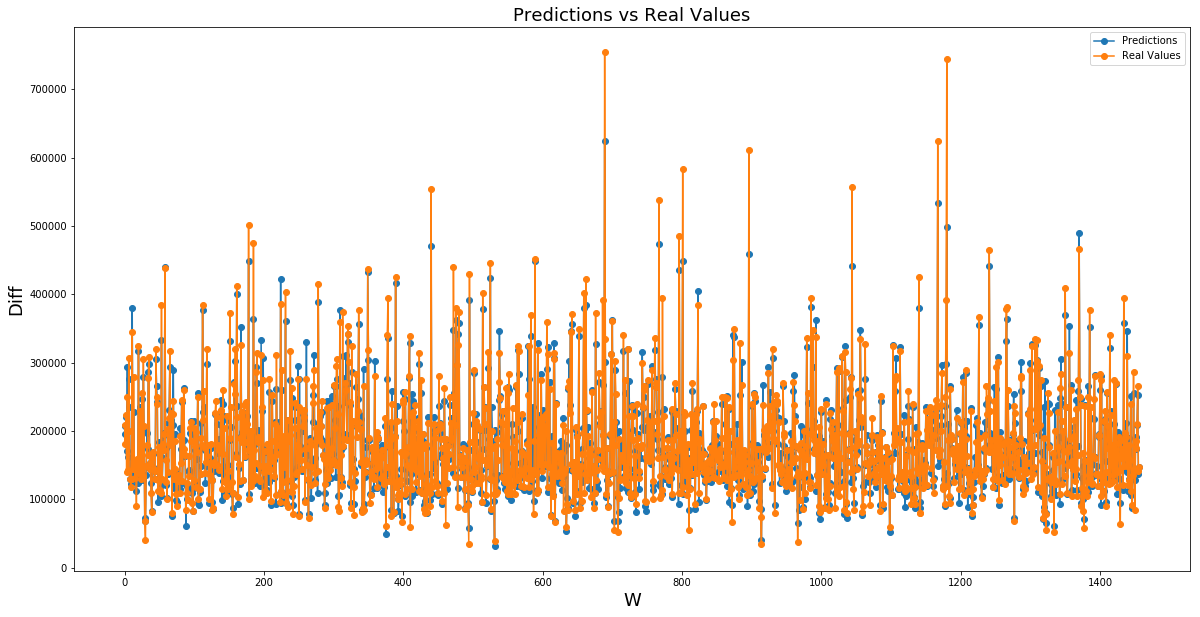

In [127]:
plt.figure(figsize=(20,10))
plt.plot([( row['Predictions'],row['SalePrice']
              ) for index, row in mod.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['Predictions','Real Values'], fontsize=10, loc='upperleft')
plt.show()

In [128]:
pR,rmR,mK=predict_data(df_model,KernelRidge(alpha=19.0001, degree=2, coef0=3))

In [129]:
rmR

0.06973272177867472

In [130]:
pR.head(5)

SalePrice
1461  118406.074542
1462  157997.582370
1463  181279.259159
1464  197034.439249
1465  194416.217523

In [131]:
pR2,rmR,mK=predict_data(df_model2,KernelRidge(alpha=19.0001, degree=2, coef0=3))

In [132]:
rmR

0.06530876290037574

In [133]:
pR2.head(5)

SalePrice
1461  119648.761388
1462  153276.422957
1463  180379.396685
1464  196800.733803
1465  197128.361834

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


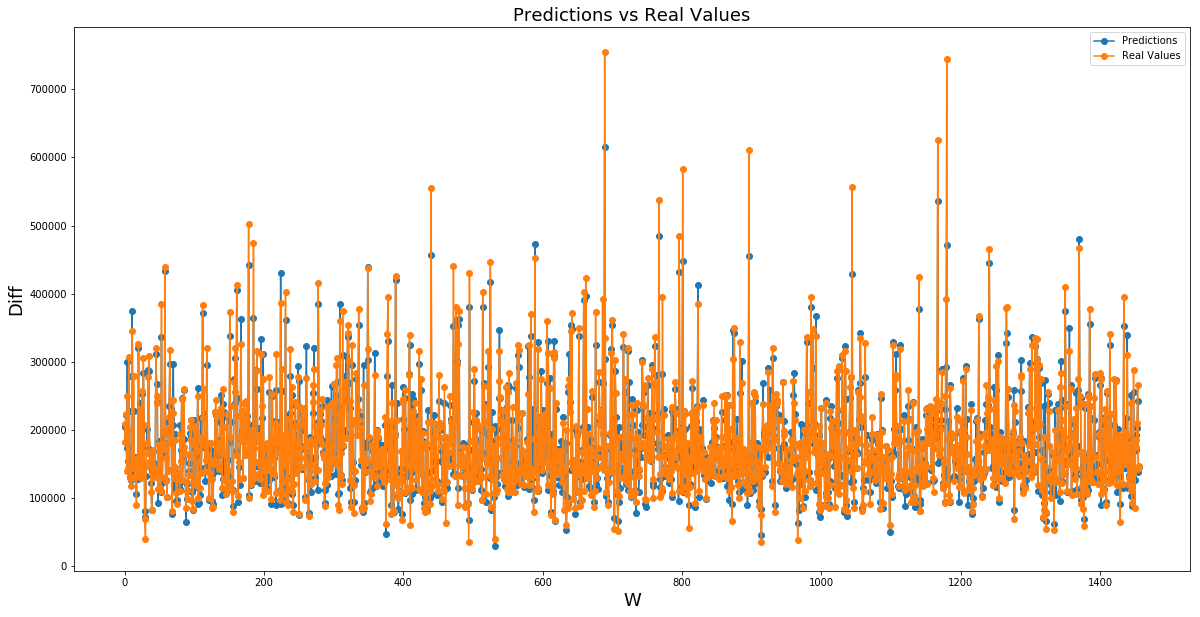

In [134]:
plt.figure(figsize=(20,10))
plt.plot([( row['Predictions'],row['SalePrice']
              ) for index, row in mK.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['Predictions','Real Values'], fontsize=10, loc='upperleft')
plt.show()

In [135]:
pBR,rmB,mBR=predict_data(df_model,linear_model.ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.00002000000000001,0.0008,19.0001], 
                           cv = 3))

C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

In [136]:
rmB

0.06807301604126355

In [137]:
pBR.head(5)

SalePrice
1461  116667.614210
1462  152002.586197
1463  178688.905367
1464  192381.072894
1465  196009.879137

In [138]:
pBR2,rmB,mBR=predict_data(df_model2,linear_model.ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.00002000000000001,0.0008,19.0001], 
                           cv = 3))

C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Tarnet\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

In [139]:
rmB

0.06373102801523828

In [140]:
pBR2.head(5)

SalePrice
1461  115246.644562
1462  152988.044277
1463  178368.819953
1464  191848.596733
1465  199500.754213

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


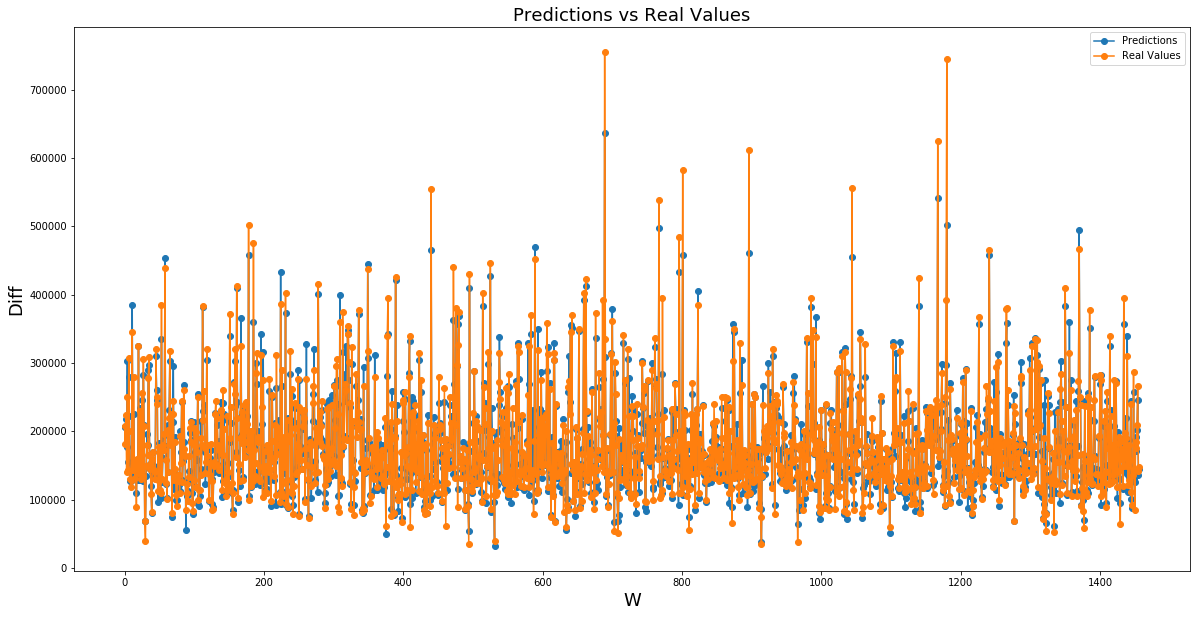

In [141]:
plt.figure(figsize=(20,10))
plt.plot([( row['Predictions'],row['SalePrice']
              ) for index, row in mBR.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['Predictions','Real Values'], fontsize=10, loc='upperleft')
plt.show()

In [290]:
import xgboost as xgb
import lightgbm as lgb

In [291]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [292]:
lgb,rmlgb,mlgb=predict_data(df_model,model_lgb)

In [294]:
lgb.head(5)

SalePrice
1461  121445.909451
1462  161045.290496
1463  180413.061054
1464  196028.792326
1465  189849.460754

In [333]:
lgb2,rmlgb2,mlgb2=predict_data(df_model2,model_lgb)

In [334]:
rmlgb2

0.0643929570722725

In [335]:
lgb2.head(5)

SalePrice
1461  126530.671052
1462  149377.742362
1463  181166.154343
1464  196369.139089
1465  191387.715327

In [336]:
lgb3,rmlgb3,mlgb3=predict_data(df_model3,model_lgb)

In [337]:
rmlgb3

0.06232519596423755

In [338]:
lgb3.head(5)

SalePrice
1461  131687.805693
1462  160904.880771
1463  180898.302996
1464  198241.722549
1465  193994.962809

In [339]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [340]:
xgb,rmxgb,mxgb=predict_data(df_model,model_xgb)
xgb.head(5)

SalePrice
1461  122799.765625
1462  154626.187500
1463  178863.718750
1464  198654.375000
1465  185202.078125

In [355]:
rmxgb

0.0678362604886968

In [341]:
xgb3,rmxgb3,mxgb3=predict_data(df_model3,model_xgb)
print(rmxgb3)
xgb3.head(5)

0.06688723711515615


SalePrice
1461  122888.210938
1462  151885.968750
1463  179197.500000
1464  198029.593750
1465  184531.609375

In [143]:
ll=pd.read_csv('fn4.csv')

In [144]:
ll.index=range(1461,2920)

In [145]:
ll.head(6)

Id      SalePrice
1461  1461  122578.467791
1462  1462  155684.764888
1463  1463  184975.120000
1464  1464  196861.533128
1465  1465  191247.785008
1466  1466  172722.685349

In [ ]:
gbr[gbr.SalePrice<60000]=gbr[gbr.SalePrice<60000]-10000
gbr[gbr.SalePrice>157000]=gbr[gbr.SalePrice>157000]+9000

In [372]:
all_predict=pd.concat([gbr,gbr4,gbr3,gbr5,gbr6,p,pE,pR,pBR2,L,lgb],axis=1)

In [373]:
#all_predict=all_predict.drop(['Id'],axis=1)

In [374]:
all_predict.head(7)

SalePrice      SalePrice      SalePrice      SalePrice  \
1461  125954.635801  130521.044206  129899.983121  125792.186140   
1462  156120.001299  159456.290714  158252.312842  157164.260202   
1463  198525.683050  186962.200137  187686.839357  186946.920001   
1464  204417.044059  201852.932602  200075.244411  194868.363349   
1465  196111.177127  182486.794318  187176.597284  185698.012299   
1466  183862.650012  171827.236224  174037.570471  175922.833653   
1467  183589.153754  173779.941777  170417.213369  176571.846913   

          SalePrice      SalePrice      SalePrice      SalePrice  \
1461  129648.404508  116360.693449  116013.511720  118406.074542   
1462  155632.367401  147798.410493  154418.913579  157997.582370   
1463  187748.983155  179439.761744  184817.975667  181279.259159   
1464  199798.385422  194784.505290  195218.494416  197034.439249   
1465  188996.221233  193495.611800  196975.718229  194416.217523   
1466  174886.481373  172475.554030  170907.148375  171645.376200   
1467  172994.427305  179633.950297  174096.549085  174047.505305   

          SalePrice      SalePrice      SalePrice  
1461  115246.644562  117941.500180  121445.909451  
1462  152988.044277  157019.466151  161045.290496  
1463  178368.819953  186974.758019  180413.061054  
1464  191848.596733  197717.326184  196028.792326  
1465  199500.754213  196620.745703  189849.460754  
1466  169381.597598  171280.406008  177321.083531  
1467  173469.156967  175507.811463  172676.402409

In [375]:
#all_predict.columns=['GBR','GBR2','g3','g4','g5','g6','p','p2','pE','pR','pBR','pBR2']

In [402]:
f=[]
for index,row in all_predict.iterrows():
    f.append(np.mean(row))
f=pd.DataFrame(f)
f.columns=['SalePrice']
f.index=range(1461,2920)
f.loc[2550]=393091.256352

In [403]:
q1 = f['SalePrice'].quantile(0.01)
q2 = f['SalePrice'].quantile(0.99)
f['SalePrice'] = f['SalePrice'].apply(lambda x: x if x > q1 else x*0.9)
f['SalePrice'] = f['SalePrice'].apply(lambda x: x if x < q2 else x*1.066)
#fin_data.to_csv('kaggle_submission.csv',index=False)

In [408]:
np.sqrt(mean_squared_error(f,ll.SalePrice))

1387.8902773416844

In [409]:
np.sqrt(mean_squared_error(f,mm.SalePrice))

5970.777160424284

In [406]:
f['SalePrice'] = f['SalePrice'].apply(lambda x: x if x < 550000 else x*0.98)

In [407]:
f[0:3]

SalePrice
1461  122475.507971
1462  156172.085439
1463  185378.569209

In [387]:
500000*0.98

490000.0

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


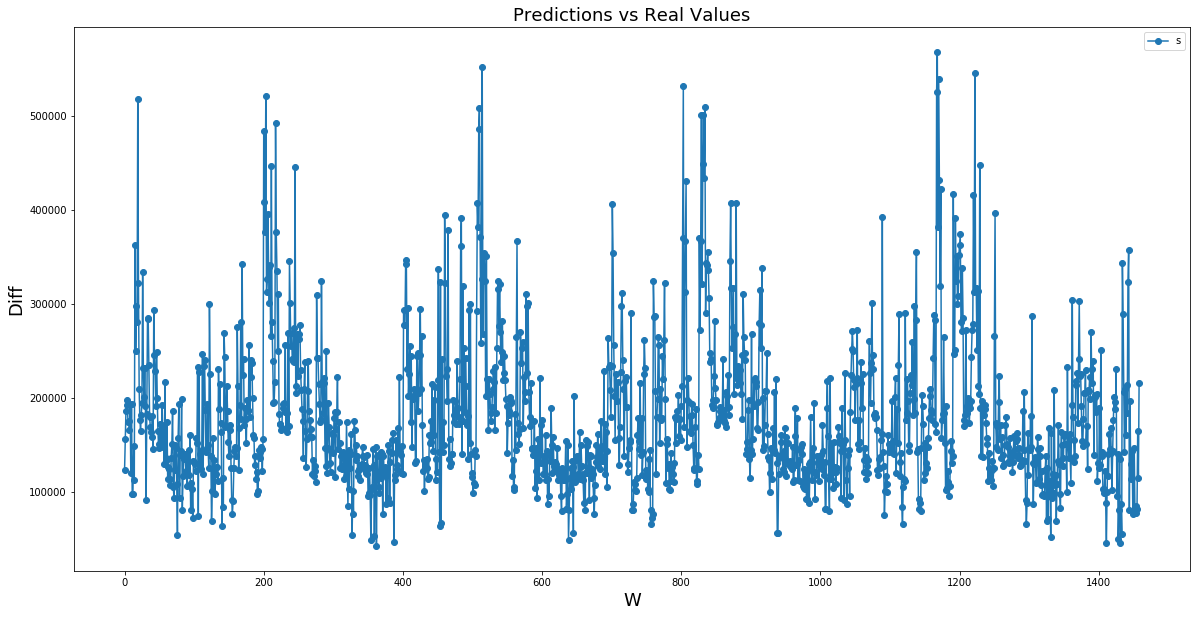

In [392]:
plt.figure(figsize=(20,10))
plt.plot([( row['SalePrice']
              ) for index, row in f.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['s'], fontsize=10, loc='upperleft')
plt.show()

In [172]:
mm=pd.read_csv('House_Prices_submit.csv')

In [316]:
ffff=pd.concat([lgb.SalePrice,ll.SalePrice],axis=1)

In [317]:
ffff.columns=['llff','mm']

C:\Users\Tarnet\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


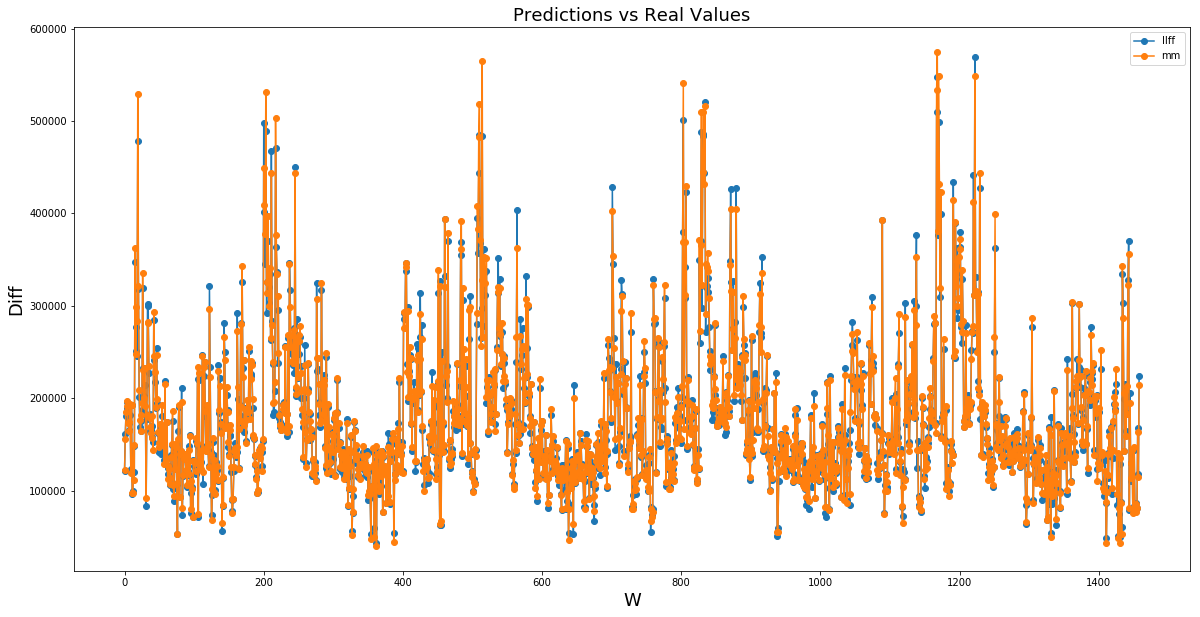

In [318]:
plt.figure(figsize=(20,10))
plt.plot([( row['llff'],row['mm']
              ) for index, row in ffff.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
plt.legend(['llff','mm'], fontsize=10, loc='upperleft')
plt.show()

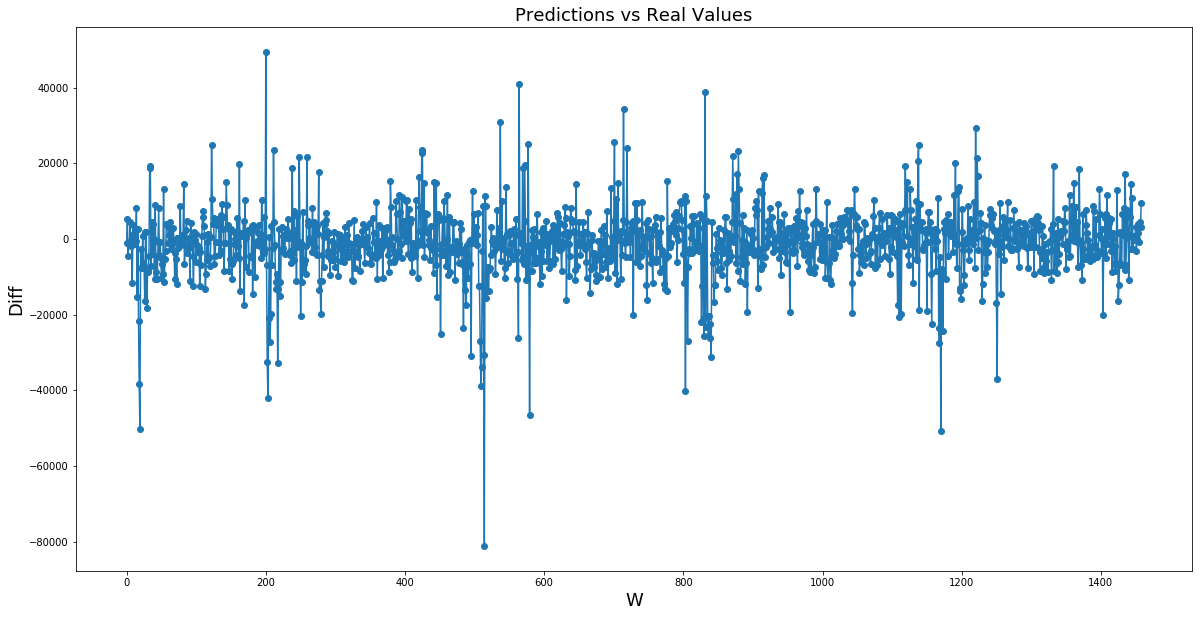

In [319]:
plt.figure(figsize=(20,10))
plt.plot([( row['llff']-row['mm']
              ) for index, row in ffff.iterrows()], 'o-')
plt.xlabel('W', fontsize=18)
plt.ylabel('Diff', fontsize=18)
plt.title('Predictions vs Real Values', fontsize=18)
#plt.legend(['Predictions'], fontsize=10, loc='upperleft')
plt.show()

In [320]:
ffff[ffff.llff-ffff.mm>50000]

Empty DataFrame
Columns: [llff, mm]
Index: []

In [312]:
lgb.loc[2550]=mm.loc[2550]

In [314]:
lgb.loc[2690]= 427661.428061

In [315]:
lgb.loc[1921]=394071.531009

In [410]:
f.to_csv('010220192.csv')